<a href="https://colab.research.google.com/github/devflash101/POC/blob/deep-learning/Deep%20Learning/chapter04_classification-and-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying movie reviews: A binary classification example

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
print(len(train_data[0]))
print(train_labels[0])

218
1


In [6]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
# word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()
# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Decodes the review. Note that the indices are offset by 3 because 0,
# 1, and 2 are reserved indices for "padding," "start of sequence," and
# "unknown."
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [18]:
decoded_review[:500]

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to ever"

## Preparing the data


In [19]:
import numpy as np

def multi_hot_encode(sequences, num_classes):
    # Creates an all-zero matrix of shape (len(sequences), num_classes)
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i][sequence] = 1.0
    return results

# Vectorized training data
x_train = multi_hot_encode(train_data, num_classes=10000)
# Vectorized test data
x_test = multi_hot_encode(test_data, num_classes=10000)

In [20]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [21]:
y_train = train_labels.astype("float32")
y_test = test_labels.astype("float32")

## Building model


In [36]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [37]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6720 - loss: 0.6394 - val_accuracy: 0.8555 - val_loss: 0.4247
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8857 - loss: 0.3537 - val_accuracy: 0.8826 - val_loss: 0.3098
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9295 - loss: 0.2281 - val_accuracy: 0.8895 - val_loss: 0.2801
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9489 - loss: 0.1668 - val_accuracy: 0.8888 - val_loss: 0.2785
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9634 - loss: 0.1272 - val_accuracy: 0.8875 - val_loss: 0.2885
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9757 - loss: 0.0973 - val_accuracy: 0.8839 - val_loss: 0.3070
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9821 - loss: 0.0761 - val_accuracy: 0.8827 - val_loss: 0.3303
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9896 - loss: 0.0554 - val_accuracy: 0.8797 - v

In [38]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6983 - loss: 0.6089 - val_accuracy: 0.8676 - val_loss: 0.3742
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9004 - loss: 0.3025 - val_accuracy: 0.8914 - val_loss: 0.2871
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9330 - loss: 0.2036 - val_accuracy: 0.8934 - val_loss: 0.2730
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9509 - loss: 0.1566 - val_accuracy: 0.8890 - val_loss: 0.2808
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9609 - loss: 0.1259 - val_accuracy: 0.8850 - val_loss: 0.3173
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9667 - loss: 0.1032 - val_accuracy: 0.8804 - val_loss: 0.3495
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9731 - loss: 0.0894 - val_accuracy: 0.8808 - val_loss: 0.3599
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9842 - loss: 0.0654 - val_accuracy: 0.8802 - v

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

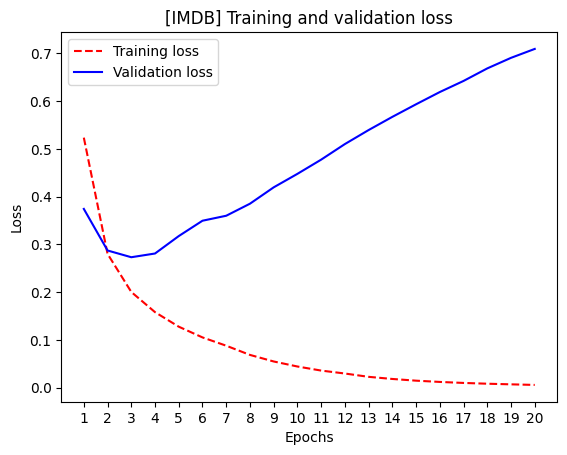

In [40]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
# "r--" is for "dashed red line."
plt.plot(epochs, loss_values, "r--", label="Training loss")
# "b" is for "solid blue line."
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("[IMDB] Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

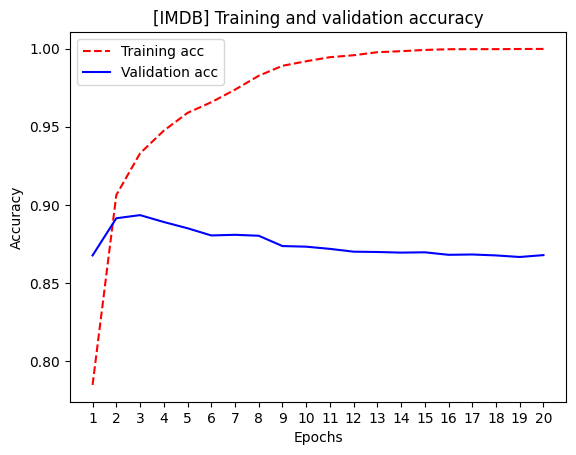

In [41]:
# Clears the figure
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("[IMDB] Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7186 - loss: 0.5891
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9113 - loss: 0.2684
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9380 - loss: 0.1879
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9532 - loss: 0.1476
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8762 - loss: 0.3138


In [44]:
results

[0.3126310408115387, 0.8776400089263916]

In [45]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.15085936],
       [0.9999816 ],
       [0.7023862 ],
       ...,
       [0.07656944],
       [0.05310884],
       [0.4128989 ]], dtype=float32)